
# <div style="color:white;background-color:black;padding:5%;text-align:center;"> EDA dun dataset de pizzas. </div>


Este dataset e sobre pizzas, precio ingredintes tamaños ect.

Ten datos de cinco marcas importantes de elaboración de pizzas na India.

Fonte do dataset:
https://www.kaggle.com/knightbearr/pizza-price-prediction

Este análise eda consta das seguintes partes:

1. Análise e limpeza dos datos
2. Análise das variables numéricas.
3. Análise das variables categóricas.
4. Análise das variables categoricas e numéricas.
5. Conclusión.


##### Importación das librerias 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

from sklearn.preprocessing import LabelEncoder #usamos esto para transformar variables categóricas a numéricas

##### Importamos os dataset e facemos una visión xeral dos datos

In [2]:
#hithub
#url:https://github.com/knightbearr/Guessing-Prices-Pizza/tree/main/Pizza%20Dataset/pizza_v1.csv
df=pd.read_csv('datasets/pizza_v2.csv')
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [3]:
df.shape
#vemos que temos 131 filas e nove columnas

(131, 9)

In [4]:
#creamos esta función para que o color se nos vaia xerando aleatoriamente
def color():
    color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    return color

### 1. Análise e limpeza :

Este dataset ten os seguintes campos:

* company: Índica o Pizza Maker de 5 empresas.	String (categórica)
* price: Índica o precio en Rupias.	String (convertimos a float)
* diameter: Diametro da pizza en polgadas. String (convertimos a float)
* topping:	Ingrediente principal.	String (categórica)
* variant:	Variante da pizza String (categórica)
* size:	Tamaño String (categorica)
* extra_sauce: Indica se hai prebe extra presente como cobertura adicional. Boolean( categórica)
* extra_cheese: Indica se hai extra de queixo presente como cobertura adicional. Boolean( categórica)
* extra_mushrooms: Indica se hai extra de champiñóns presente como cobertura adicional Boolean.( categórica) 


In [5]:
df.columns

Index(['company', 'price_rupiah', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          131 non-null    object
 1   price_rupiah     131 non-null    object
 2   diameter         131 non-null    object
 3   topping          131 non-null    object
 4   variant          131 non-null    object
 5   size             131 non-null    object
 6   extra_sauce      131 non-null    object
 7   extra_cheese     131 non-null    object
 8   extra_mushrooms  131 non-null    object
dtypes: object(9)
memory usage: 9.3+ KB


Todas as variables son tipo object pero vamos a pasar price a numerico e o diametro tamén.

##### Formateamos precio e conversión a numérica

In [7]:

df['price_rupiah'] = df['price_rupiah'].str.replace('Rp', '').str.replace(',', '')

# Convertemolo a  numerico
df['price_rupiah'] = pd.to_numeric(df['price_rupiah'])
#Convertemos a float
df['price_rupiah'] = df['price_rupiah'].astype('float64')



In [8]:
#cambiamos o nome da variable
df.rename({'price_rupiah': 'price'}, axis=1, inplace=True)

##### Formateamos diametro e convertimolo a numérico

In [9]:
df['diameter'].unique()

array(['22 inch', '20 inch', '16 inch', '14 inch', '18 inch', '18.5 inch',
       '8 inch', '12 inch', '16.5 inch', '8.5 inch', '17 inch',
       '14 inch\n'], dtype=object)

In [10]:
df['diameter'] = df['diameter'].str.replace('inch', '').str.replace(',', '')

# Convertemolo a  numerico
df['diameter'] = pd.to_numeric(df['diameter'])
#Convertemos a float
df['diameter'] = df['diameter'].astype('float64')

#####  Buscamos nulos

In [11]:
df.isnull().sum()
#df.isna().sum()


company            0
price              0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

Non temos nulos.
En caso de telos teriamos distintas tecnicas para elimnalos dependedo da cantidade de nulos e importancia.
Algunhas delas son:
* Poderiamos eliminar a fila.
* Sustituilo pola media(en caso de variables numéricas)
* Sustituilo por algunha palabra(variables categóricas)


#####  Buscamos filas duplicadas

In [12]:
print(f'Total de filas duplicadas: {df.duplicated().sum()}')


Total de filas duplicadas: 4


In [13]:

df.drop_duplicates(inplace=True)
df.shape

(127, 9)

Despos da limpeza dos datos temos 127 filas e nove columnas.

Vemos que variables numericas e categoricas temos:

In [14]:
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)
print(f'Variables categóricas: {cats}')
print(f'Variables numéricas: {nums}')

Variables categóricas: ['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese', 'extra_mushrooms']
Variables numéricas: ['price', 'diameter']


Creamos un dataset para as numéricas e outro para as categóricas

In [15]:
df_nums= df[nums]
df_nums.head()

,price,diameter
0,235000.0,22.0
1,198000.0,20.0
2,120000.0,16.0
3,155000.0,14.0
4,248000.0,18.0


In [16]:
df_cat= df[cats]
df_cat.head()

,company,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,chicken,double_signature,jumbo,yes,yes,no
1,A,papperoni,double_signature,jumbo,yes,yes,no
2,A,mushrooms,double_signature,reguler,yes,yes,yes
3,A,smoked_beef,double_signature,reguler,yes,no,yes
4,A,mozzarella,double_signature,jumbo,yes,no,yes


### 2. Análise das variables numericas 

In [17]:
df_nums.describe()

,price,diameter
count,127.000000,127.000000
mean,86964.566929,12.913386
std,44989.248323,3.258746
min,23500.000000,8.000000
25%,50000.000000,12.000000
50%,78000.000000,12.000000
75%,105000.000000,14.000000
max,248000.000000,22.000000


O diámetro:
* O diámetro medio e case 13 polgadas 
* O diámetro mínimo e  de 8 polgadas
* O diámetro máximo e de 22 polgadas

O precio:
* O precio medio e de 86.964 rupias (uns 5,20 euros)
* A pizza máis barata costa 23.500 rupias (1,40 €)
* A pizza máis cara costa 248.000 rupias (14,77 €)



####  Procura de outliners



Mostramos a distribución de tres maneiras diferentes:  dos datos cun boxplot, histograma, e cunha combinación de dous: violinplot e stripplot

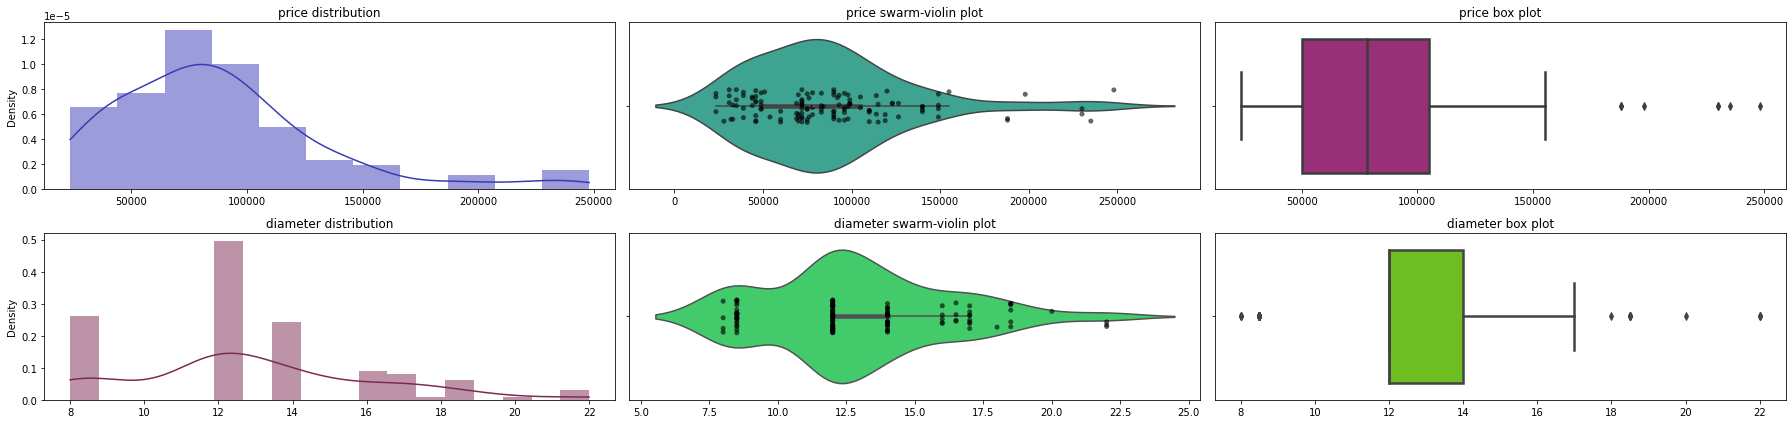

In [18]:
rows = len(nums)
cols = 3
fig = plt.figure(1, (25, rows*3))

i = 0
for col in nums:
    #histograma
    i += 1
    ax1 = plt.subplot(rows, cols,i)    
    sns.histplot(data=df_nums, x=df_nums[col], color=color(), label="100% Equities", kde=True, stat="density", linewidth=0)
    ax1.set_xlabel(None)
    ax1.set_title(f'{col} distribution')
    plt.tight_layout()

    #violinplot con stripplot
    i += 1
    ax2 = plt.subplot(rows, cols,i)
    sns.violinplot(data=df_nums, x=df_nums[col],color=color())
    sns.stripplot(data=df_nums, x=df_nums[col], alpha=0.6, color='k')
    ax2.set_xlabel(None)
    ax2.set_title(f'{col} swarm-violin plot')
    plt.tight_layout()
    #boxplot: aqui vemos vas claramente outliners.
    i += 1
    ax3 = plt.subplot(rows, cols,i)
    sns.boxplot(data=df_nums, x=df_nums[col], orient='h', linewidth=2.5,color=color())
    ax3.set_xlabel(None)
    ax3.set_title(f'{col} box plot')
    plt.tight_layout()

Vemos que a variable diametro e precio teñen outliners.

In [19]:
parametro=["diameter","price"]
for p in parametro:
    q1 = df_nums[p].quantile(0.25)
    q3 = df_nums[p].quantile(0.75)
    IQR = q3 - q1

    BI = q1 - 1.5 * IQR
    BS = q3 + 1.5 * IQR
    print("Para",p)
    print("Quantile 1:", q1)
    print("Quantile 3:", q3)
    print("Inter Quartile Rango:",IQR)
    print("Bigote inferior:",BI)
    print("Bigote Superior:",BS)


Para diameter
Quantile 1: 12.0
Quantile 3: 14.0
Inter Quartile Rango: 2.0
Bigote inferior: 9.0
Bigote Superior: 17.0
Para price
Quantile 1: 50000.0
Quantile 3: 105000.0
Inter Quartile Rango: 55000.0
Bigote inferior: -32500.0
Bigote Superior: 187500.0


A variable diametro ten valores atípicos non hai valores entre 12 e 9 polo que os que estan por debaixo de 9 consideranse atípicos. Eliminar os valores por de baixo do bigote inferior (9,0) eliminaria os valores atípicos e estabilizaria o diagrama, pero tamén perderianse demasiados valores. Polo que o vamos deixar igual.

En canto a precio vamos a deixalos tamen vemos que son por que temos  uns cinco valores de pizzas mais caros, e vamos deixalos para non ter que elimar filas do dataset.


#### Graficos de dispersión e matriz de correlación das variables numericas.

 Tamen vamos ver a distribucíon dos valores numericas cuns diagramas de intensidade.


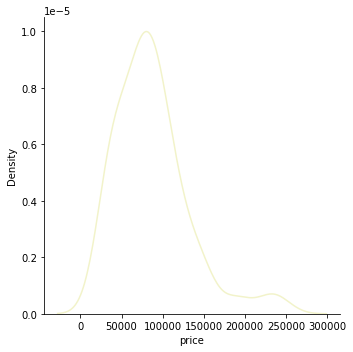

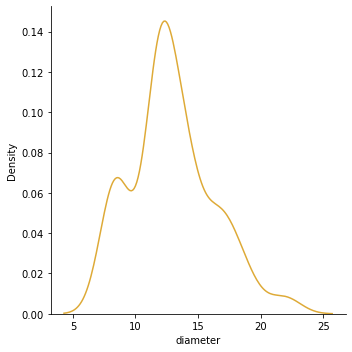

In [20]:
numericas = list(df_nums.columns)

for variable in numericas:

    sns.displot(data=df_nums,x=variable, kind='kde',color=color())
 

Aquí vemos que a maioria dos valores en diametro estan entre 10 e 15.

E que o precio maioritario e entre 50.000 e 150.000 rph.

Aqui vemos unha gráfica de distribución respecto a price.

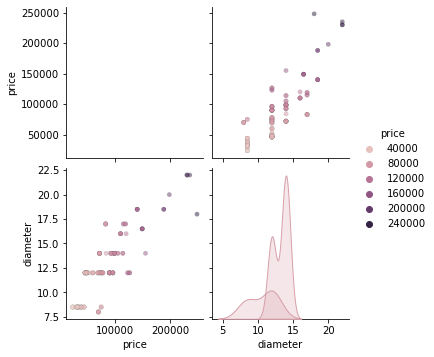

In [21]:
#sns.pairplot(data=df_nums, hue='price')
sns.pairplot(data=df_nums, vars=nums, diag_kind='kde', hue='price',
            plot_kws=dict(s=20, edgecolor="k", linewidth=0.1, alpha=0.5), diag_kws=dict(shade=True))
plt.show()

<AxesSubplot:xlabel='diameter', ylabel='price'>

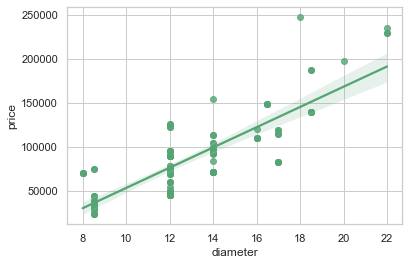

In [75]:
# Mostra a correlación entre as dúas variables, agora cunha recta de regresión 
sns.regplot(x=df_nums.diameter, y=df_nums.price,color=color())

Visualizamos a matriz de correlación entre as diferentes variables numéricas e danos unha rápida impresión sobre a correlación forte que existe entre o precio e o diámetro.


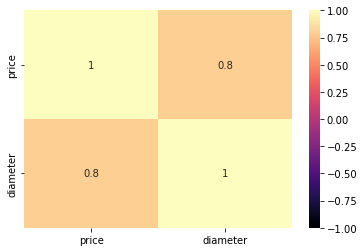

In [22]:
sns.heatmap(df_nums.corr(method='spearman'), annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'magma')
plt.show()
#observamos que entre precio e diametro hai unha correlación forte.

#### Detalles das numéricas

Tamaño mais vendido:

Text(0.5, 1.0, 'Tamaño mais vendido')

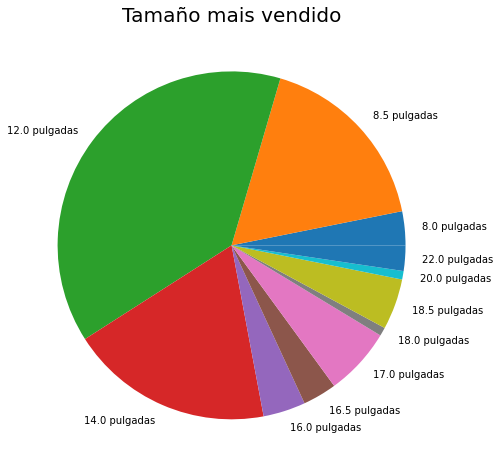

In [23]:

size_sales = df_nums.groupby('diameter').price.count() #agrupamos o diametro polo precio.
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(x = size_sales.values, labels= [str(s)+' pulgadas'for s in size_sales.index])
ax.set_title('Tamaño mais vendido', fontdict={'fontsize':20})


Vemos que e o de 12 pulgadas.

### 3. Análise das variables categoricas 

In [24]:
print(f'Variables categóricas: {cats}')

Variables categóricas: ['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese', 'extra_mushrooms']


In [25]:
df_cat.sample(5)

,company,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
106,E,mushrooms,classic,small,yes,yes,no
48,B,mushrooms,double_decker,medium,no,yes,no
84,D,chicken,double_mix,jumbo,yes,yes,yes
69,C,vegetables,italian_veggie,large,yes,yes,no
109,E,mushrooms,crunchy,medium,no,yes,yes


Vamos ver todos os valores que poden acadar as nosas variables categoricas  e o numero que temos.

In [26]:

for v in cats:
    print(f" A variable categorica {v}: {len(pd.unique(df_cat[v]))} son: {pd.unique(df_cat[v])}")


 A variable categorica company: 5 son: ['A' 'B' 'C' 'D' 'E']
 A variable categorica topping: 12 son: ['chicken' 'papperoni' 'mushrooms' 'smoked_beef' 'mozzarella'
 'black_papper' 'tuna' 'meat' 'sausage' 'onion' 'vegetables' 'beef']
 A variable categorica variant: 20 son: ['double_signature' 'american_favorite' 'super_supreme' 'meat_lovers'
 'double_mix' 'classic' 'crunchy' 'new_york' 'double_decker' 'spicy_tuna'
 'BBQ_meat_fiesta' 'BBQ_sausage' 'extravaganza' 'meat_eater'
 'gournet_greek' 'italian_veggie' 'thai_veggie' 'american_classic'
 'neptune_tuna' 'spicy tuna']
 A variable categorica size: 6 son: ['jumbo' 'reguler' 'small' 'medium' 'large' 'XL']
 A variable categorica extra_sauce: 2 son: ['yes' 'no']
 A variable categorica extra_cheese: 2 son: ['yes' 'no']
 A variable categorica extra_mushrooms: 2 son: ['no' 'yes']


#### Distribución dos datos nas variables categóricas

##### Compañia:

Text(0.5, 1.0, 'Marcas')

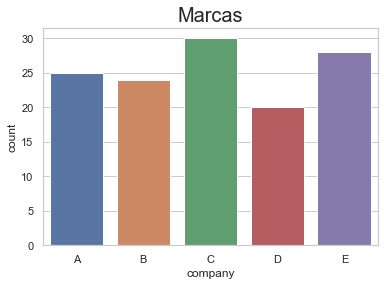

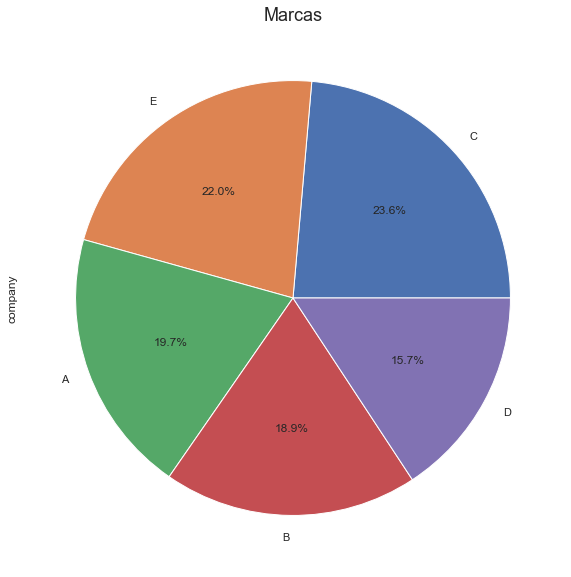

In [83]:
#cun histograma
sns.set_theme(style='whitegrid')
plt.title('Marcas',fontsize=20)
sns.countplot(data=df_cat,x='company')
plt.figure(figsize=(20,10))
df_cat.company.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Marcas',fontsize=18)

Vemos que as marcas que mais valores teñen e a E e a C. 
No diagrama circular apreciamos mellor que a que mais valores ten e a C.

##### Ingredientes:

Text(0.5, 1.0, 'Ingredientes')

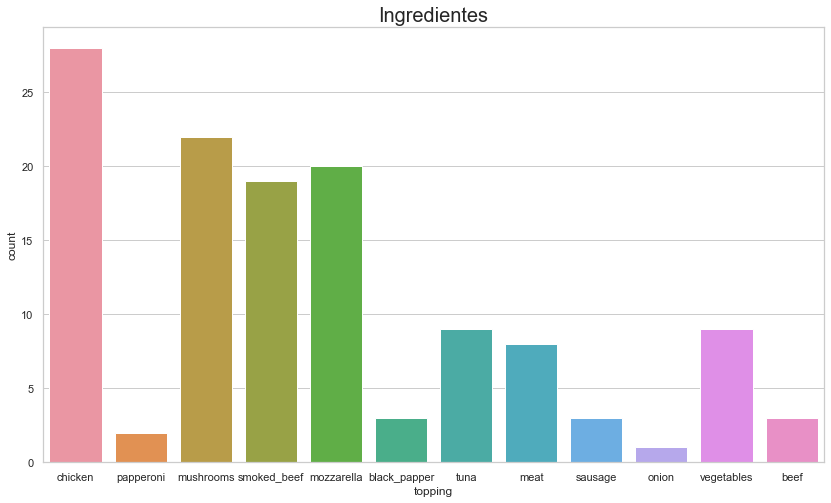

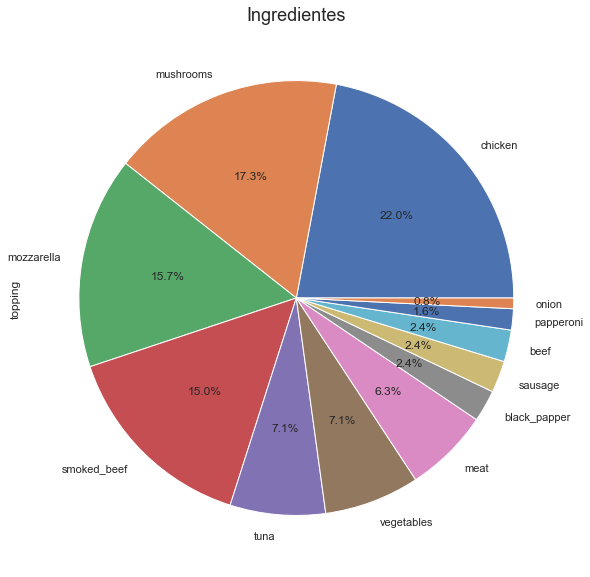

In [28]:
#cun hsitograma
fig = plt.figure(1, (14, 8))

plt.title('Ingredientes',fontsize=20)
sns.countplot(data=df_cat,x='topping')
plt.figure(figsize=(30,10))
df_cat.topping.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Ingredientes',fontsize=18)

En canto a ingrediente maioritario vemos que e o  polo e o menos a  cebola.

##### Variantes:

<AxesSubplot:title={'center':'Variantes'}, xlabel='count', ylabel='variant'>

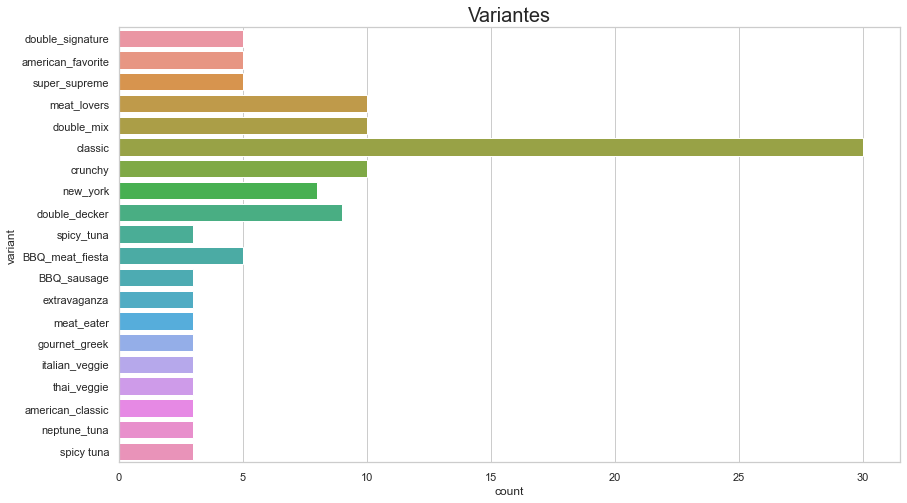

In [29]:

fig = plt.figure(1, (14, 8))

plt.title('Variantes',fontsize=20)
sns.countplot(data=df_cat,y='variant')


En canto a variante despunta claramente a clasica.

##### Tamaño:

<AxesSubplot:title={'center':'Tamaños'}, xlabel='size', ylabel='count'>

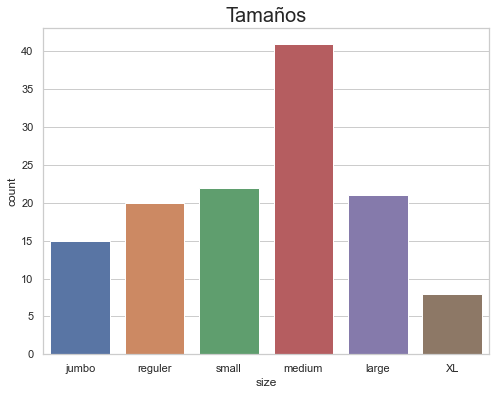

In [30]:
fig = plt.figure(1, (8, 6))

plt.title('Tamaños',fontsize=20)
sns.countplot(data=df_cat,x='size')

En canto os tamaños vese claramente que a que despunta e a mediana.

##### Ingredientes extra

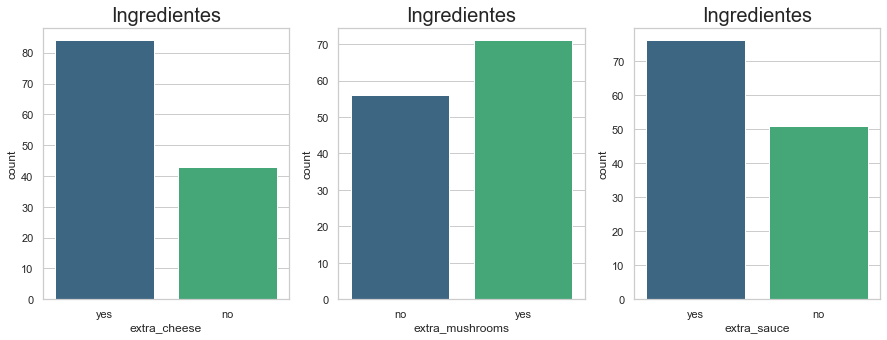

In [31]:
plt.figure(figsize=[15,5])

extra_list = ['extra_cheese','extra_mushrooms','extra_sauce',]

for index, extras in enumerate(extra_list):     
    plt.subplot(1,3,index+1) 
    
    fig = plt.figure(1, (6, 5))
    plt.title('Ingredientes',fontsize=20)
    sns.countplot(data=df_cat,x=extras,palette='viridis') 


  

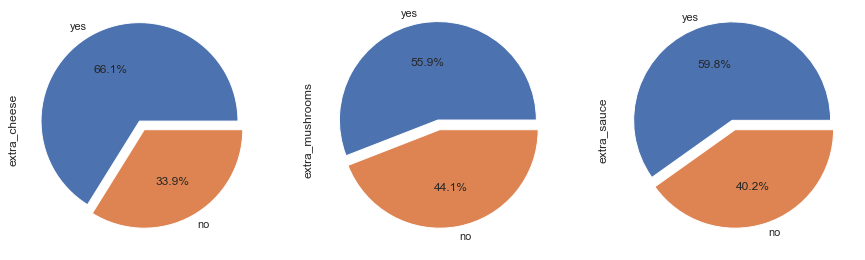

In [32]:
plt.figure(figsize=[15,5])
for index, extras in enumerate(extra_list):     
    plt.subplot(1,3,index+1) 
    #plt.figure(figsize=(10,10))
    fig = plt.figure(1, (14, 8))
    
    df_cat[extras].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=[0.1,0])

No promedio, a maioria das pizzas teñen mas ingredientes adiccionais (champiñons, quiexo , e prebe)
En particular, a cobertura mais consumida e a de extra de queixo.


#### Relación entre variables categoricas

Agora vamos a ver a relación dos ingredientes extras:
Para poder ver a relación temos que facer a estas variables categoricas numericas. 


In [33]:
#primeiro vamos a copiar o dataset orixinal
encoded_df=df.copy(deep=True)

In [34]:

#sustituimos en todo os yes e no por 1 e 0
encoded_df.replace(('yes', 'no'), (1, 0), inplace=True)



Text(0.5, 1.0, 'Correlation Matrix')

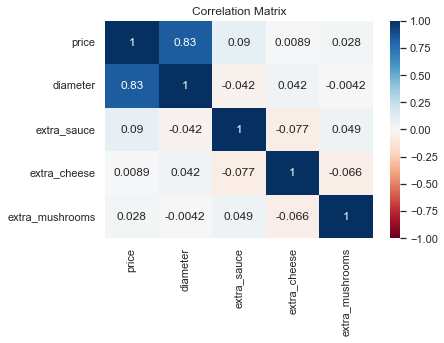

In [35]:
sns.heatmap(encoded_df.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation Matrix') #facemos unha matriz de correlación 

Observamos o igual que na matriz de correlación anterior a gran correlación que hay entre o precio e o diametro, en cambio  cos ingredientes extras parece non estar moi relacionado.

Vamos mirar agora a correlación que hai entre todas as variables para eso  iso sustiuir os valores categoricos que nos quedan por numeros.
* Size e unha variable que ten os valores small, medium, large, xl, jumbo asi que mediante map imos por 0,1,2,3,4.
* O resto das columnas imolas codificar con LabelEncoder

In [36]:
encoded_df['size'] = encoded_df['size'].map({'small':'0','medium':'1','large':'2','XL':'3','jumbo':'4'})

In [37]:
categorical_cols = ['topping', 'variant','company']
encoder = LabelEncoder() #usamolo para pasalas a numeros
for col in categorical_cols:
    encoded_df[col] = encoder.fit_transform(encoded_df[col])

Text(0.5, 1.0, 'Correlation Matrix')

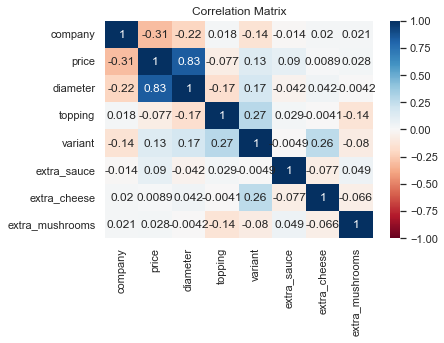

In [38]:
sns.heatmap(encoded_df.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation Matrix')

Vemos que non temos ningunha novidade as relacións mais fortes e salientables seguen sendo entre o precio e o diametro e teñen unha relación de 0.83, xa a seguinte cunha relación moito menor e a variante repecto o topping de 0.27.

#### Representación das variables categoricas entre si.

In [39]:
def countplot_of_2(x,hue,title=None,figsize=(7,7)):
    plt.figure(figsize=figsize)
    sns.countplot(data=df[[x,hue]],x=x,hue=hue)
    plt.title(title)
    plt.show()
#creamos esta función para non ter que tar repetindo o codigo todo o tempo

##### Marca  según o tamaño da pizza

Neste grafico vemos a compañaia segun o tamaño de pizza. 
Observamos que a a compañia A solo produce dous tamaños de pizza.
Que e a compañia D en cambio produce todos os tamaños

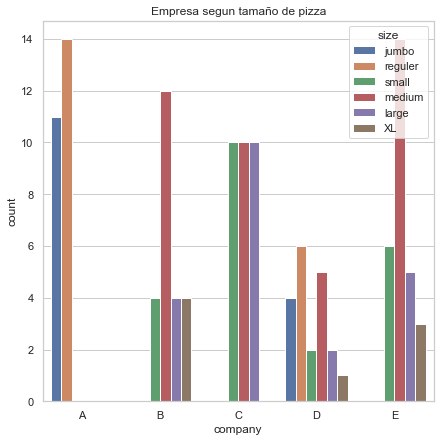

In [40]:
countplot_of_2('company','size','Empresa segun tamaño de pizza')


##### Marca segun variante:

Observase que a marca que mais varientes ten e a c pero en pouca cantidade. 

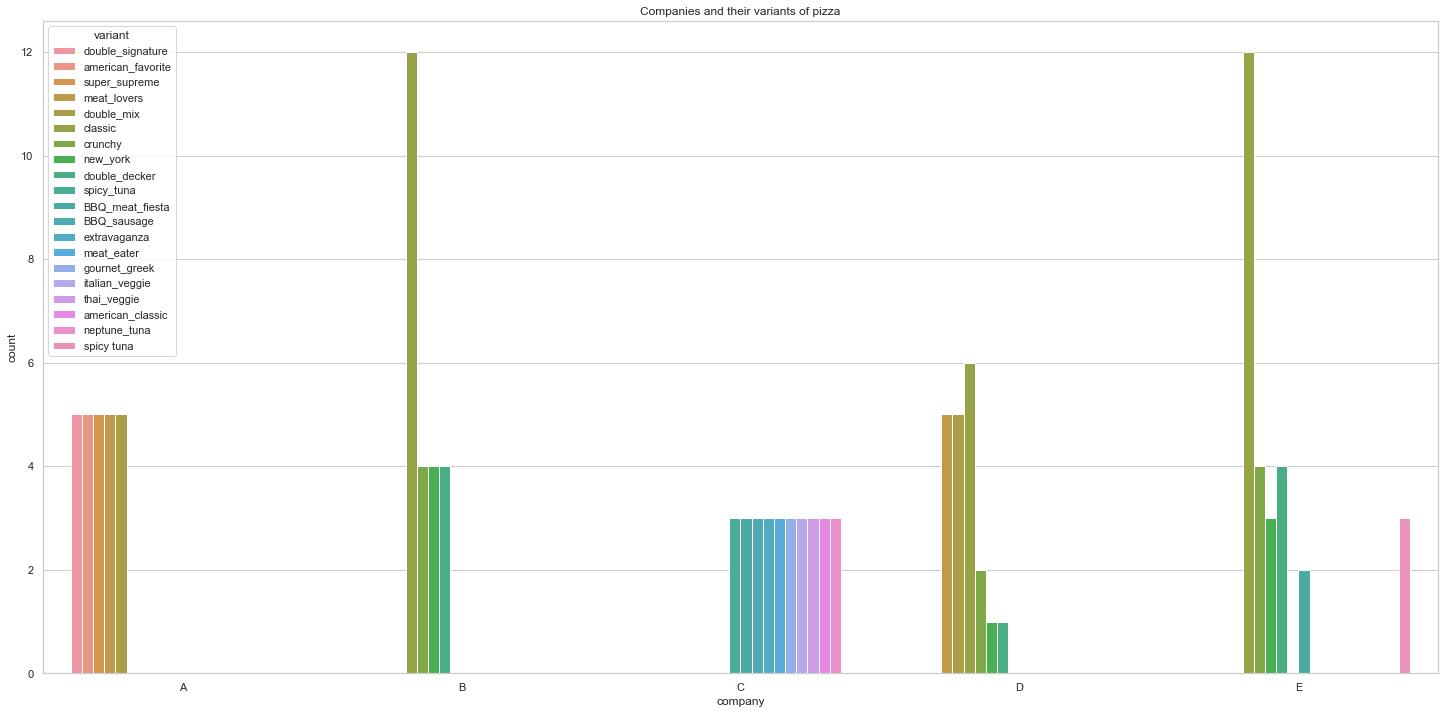

In [41]:

countplot_of_2('company','variant','Companies and their variants of pizza',(25,12))

##### Marca ingrediente principal: 

Aqui vemos que todas as marcas teñen pizza de polo, e que a marca que mais ingredientes ten e a C.

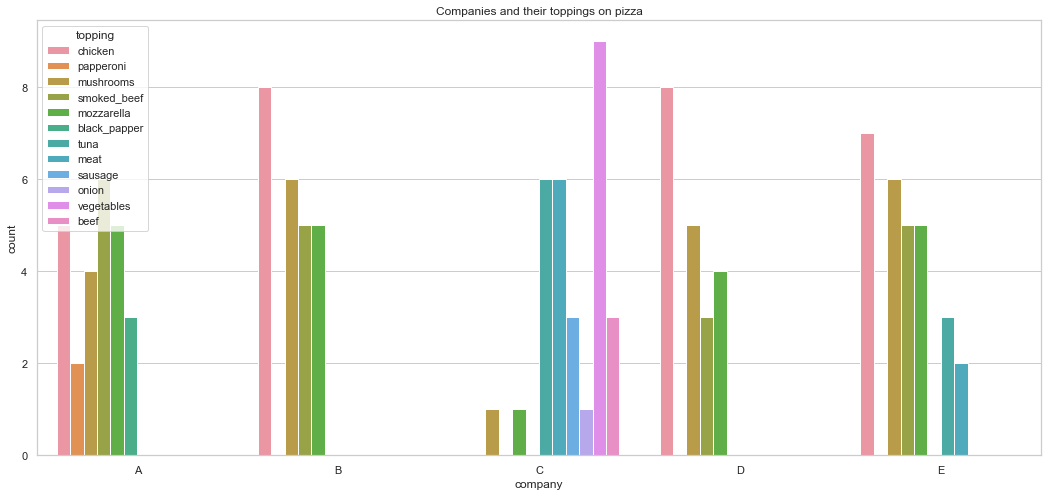

In [42]:
countplot_of_2('company','topping','Companies and their toppings on pizza',(18,8))

##### Extra de prebe / ingrediente

E nesta por ultimo vemos os ingredientes en función da extra de prebe.
E cabe resaltar que co ingrediente  de polo, hai o mesmo numero con extra de prebe que sen el.
Que a de atun, cebola e terneira ten sempre extra de prebe.

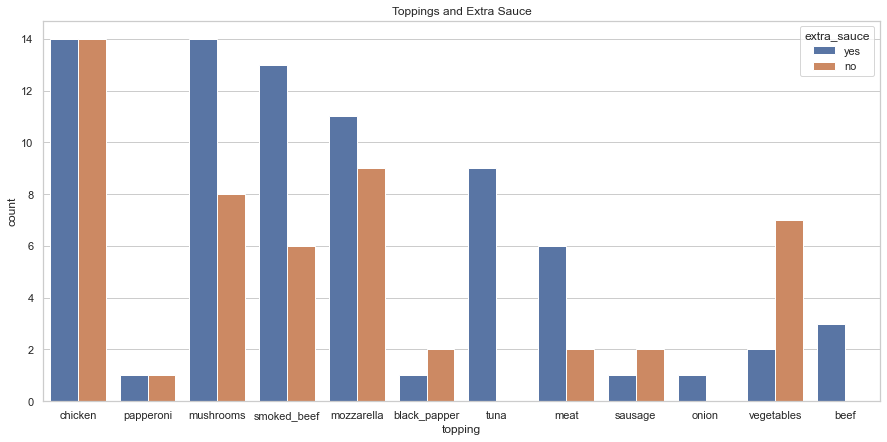

In [43]:
countplot_of_2('topping','extra_sauce','Toppings and Extra Sauce',(15,7))

### 4. Análise variables numericas con categoricas

##### Precio - topping

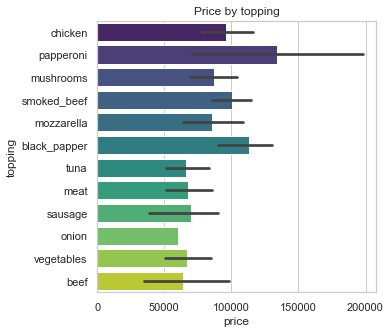

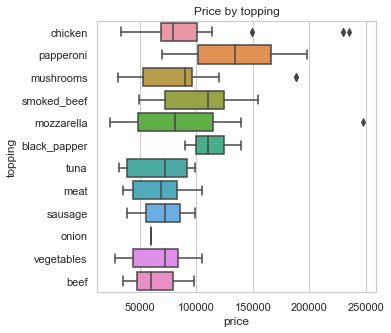

In [44]:

plt.figure(figsize=(5,5))
sns.barplot(data=df,x='price',y='topping',palette='viridis')
plt.title('Price by topping')
plt.show()

#plt.subplots_adjust(wspace=0.5, bottom=0.3)
plt.figure(figsize=(5,5))
sns.boxplot(x='price', y='topping', data=df)
plt.title('Price by topping')
plt.show()


A partir desta gráfica podemos decir: 

A pizza de pepperoni en promedio e mais cara cas outras pizzas.

Hai alguns valores atípicos para as pizzas de mozarella, champiñons e polo. 

E parace que solo hay una pizza que leve cebola.


##### Precio - tamaño

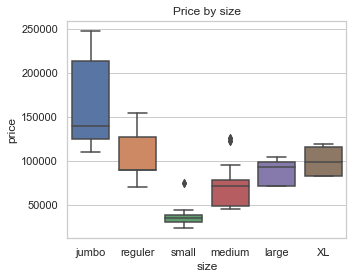

In [45]:


plt.figure(figsize=(5,4))
sns.boxplot(x='size', y='price', data=df)
plt.title('Price by size')
plt.show()



As pizzas jumbo e regurlares son as mais caras.

Esto parace un pouco raro xa que deberian ser mais baratas que as pizzas grandes como a XL ou a grande.


##### Precio- variante:

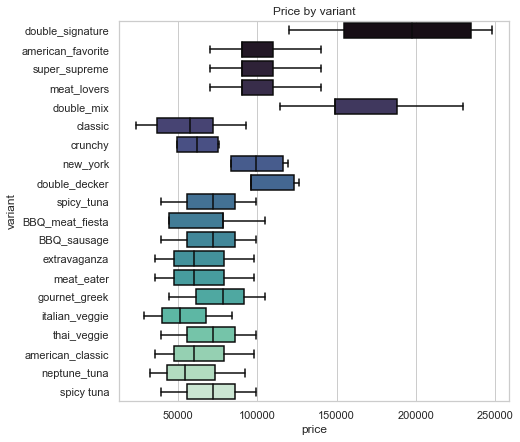

In [46]:
plt.figure(figsize=(7,7))
sns.boxplot(y='variant', x='price', data=df, palette='mako')
plt.title('Price by variant')
plt.show()

Deste grafico podemos dicir que:

As pizzas de doble_firma e doblez_mezcla son as mais caras.

As pizzas de doble firma vemos que teñen unha gran variación nos precios.

E que a de verduras clásicas italianas son mais baratas en promedio.


##### Precio - ingrediente extra

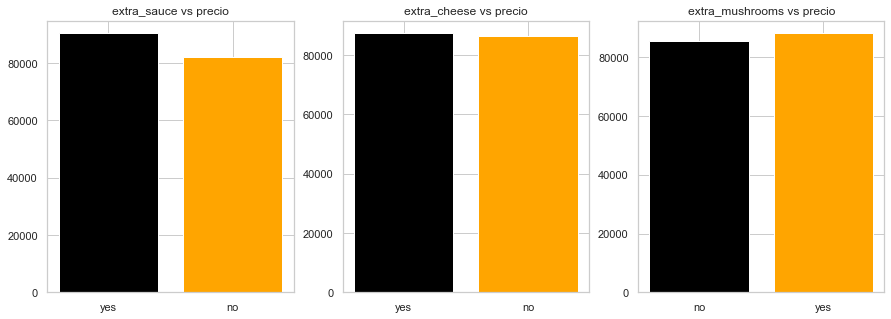

In [47]:
plt.figure(figsize=[15,5])

price = []
extra_list = ['extra_sauce','extra_cheese','extra_mushrooms']
color_ = ['black','orange']

for index, extras in enumerate(extra_list):
    for vals in list(df[extras].unique()):
        avg_price = df[df[extras] == vals]
        price.append(avg_price['price'].mean()) 
        del(avg_price)
        

for index, extras in enumerate(extra_list):       
    plt.subplot(1,3,index+1)
    plt.bar(x=list(df[extras].unique()), height=price[2*index:2*index+2], color=['black','orange'])
    plt.title(extras + " vs precio")
    
    
plt.show()

Aqui vemolos todos xuntos:
Vemos que agregar un ingrediente extra aumenta o precio pero non tanto.

E se non fixamos mais vemos que o ingrediente extra mais caro e a  extra de prebe.

Mais alo disto non hay moito impacto dos ingredintes extras repecto o precio.

##### Precio - marca

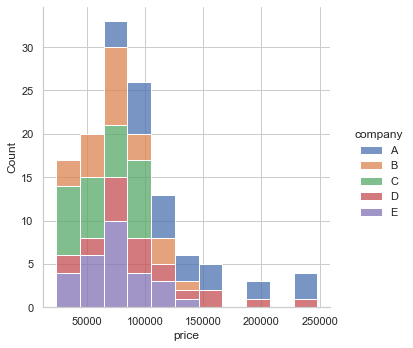

In [48]:
sns.displot(data=df, x="price", hue="company", multiple="stack")

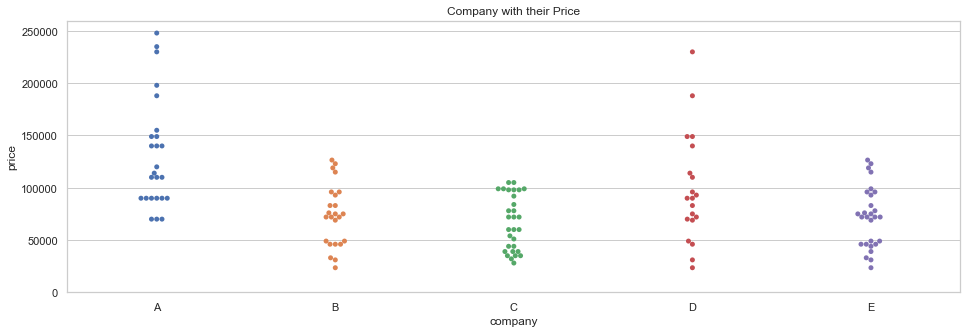

In [49]:
plt.figure(figsize=(16, 5))
sns.swarmplot(x='company', y='price', data=df)
plt.title('Company with their Price')
plt.ylim(0, 260000)
plt.show()

Vemos que as que teñen as pizzas mais caras son A e a D que a D ten pizzas de todos os prezos que a C ten as pizzas mais baratas.

Neste grafico vemos o mesmo pero un pouco mais detallado  facendo o precio medio da  pizza por empresa. Seguimos vendo que a mais cara e a A.

Text(0.5, 1.0, 'Precio medio da pizza por empresa')

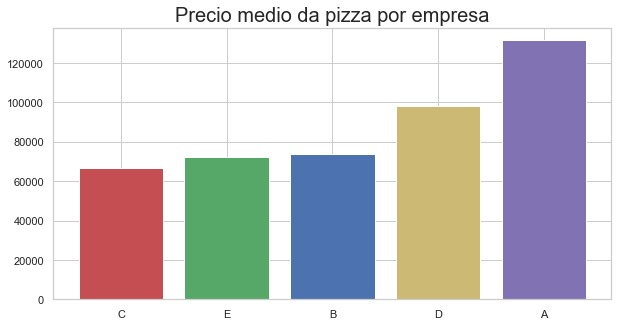

In [50]:


comp_price = df.groupby('company')['price'].mean().sort_values()
#agrupamos o precio e a compañia e ordeamos os valores
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x = comp_price.index, height = comp_price.values, color = ['r','g','b','y','C4'])
ax.set_title('Precio medio da pizza por empresa', fontdict={'fontsize':20})




##### Precio-diametro-marca

<AxesSubplot:xlabel='price', ylabel='diameter'>

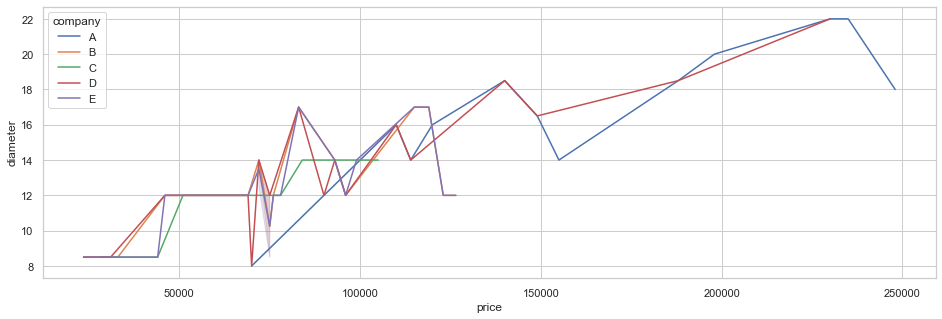

In [82]:
plt.figure(figsize=(16, 5))
sns.lineplot(data=df, x='price',y='diameter', hue='company')

Observamos que as pizzas mais caras teñan a marca A pero que e mas cara a de 18 que a de 22.


##### Precio-marca- ingredientes extra

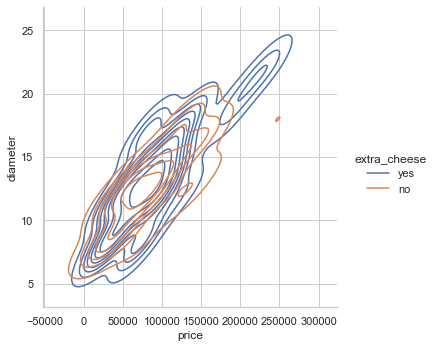

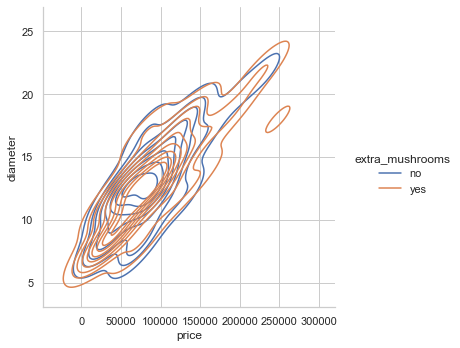

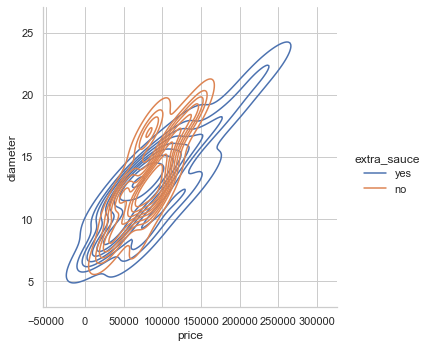

In [67]:
sns.displot(data=df, x='price',y='diameter', kind='kde', hue='extra_cheese')
sns.displot(data=df, x='price',y='diameter', kind='kde', hue='extra_mushrooms')
sns.displot(data=df, x='price',y='diameter', kind='kde', hue='extra_sauce')

Xa sabiamos que a cobertura de extra de queixo era a que mais cara era, e como era de esperar canto mais diametro ten tamen.
Na cobertura extra de champiñons vemos que a distribución e case igual e hay observanse os outliners que temos no diametro.
Na cobertura de extra de salssa vemos que se nota que a cobertura e mais cara segun mais sendo mais grande.

##### Precio - tamaño - extra de queixo

Observamos igual que antes que a pizza jumbo e a mais cara independiente de que leve queixo ou non.  

<AxesSubplot:xlabel='size', ylabel='price'>

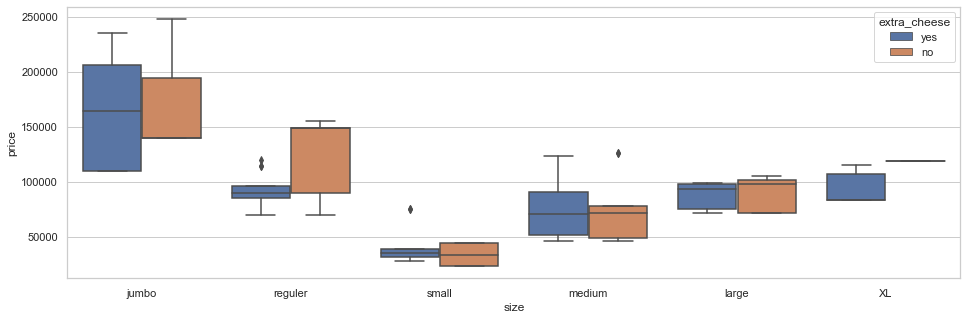

In [77]:
plt.figure(figsize=(16, 5))
sns.boxplot(data=df, x="size", y="price", hue="extra_cheese")

##### Precio-tamaño-marca

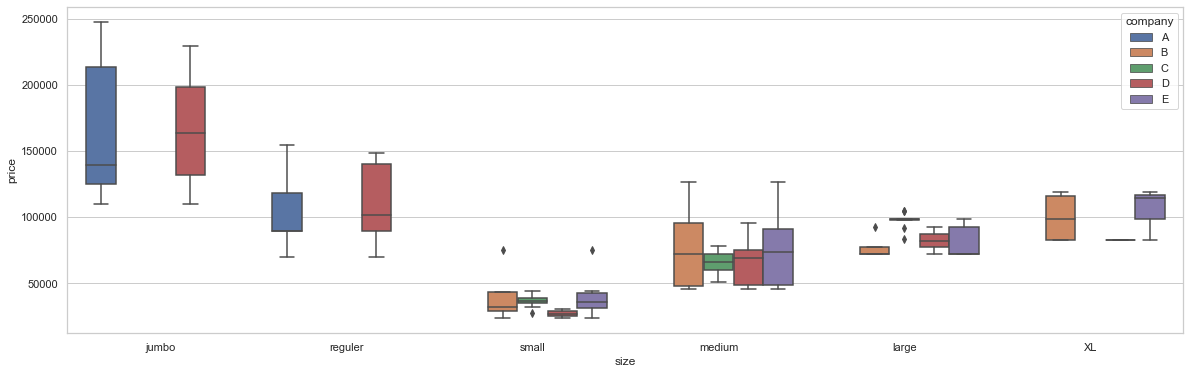

In [52]:

plt.figure(figsize=(20, 6))
sns.boxplot(x='size', y='price', data=df, hue='company')
plt.show()

Neste grafico reafirmamonos e que a empresa A e D teñen as pizzas mas caras e que o tamaño mais caro e o jumbo.
Que o diametro Xl solo o teñen as empresas B e E.

##### Precio - Marca - Ingredentes extras

Text(0.3, 1.1, 'Marca vs Precio por extra de champiñóns ou non ')

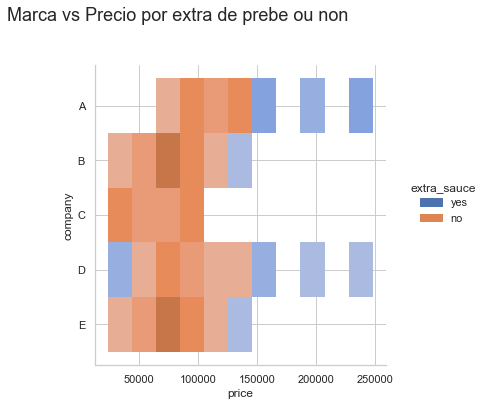

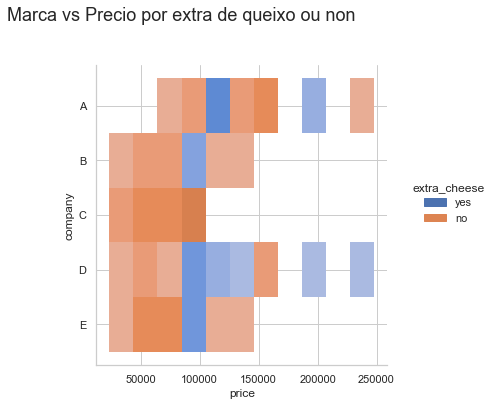

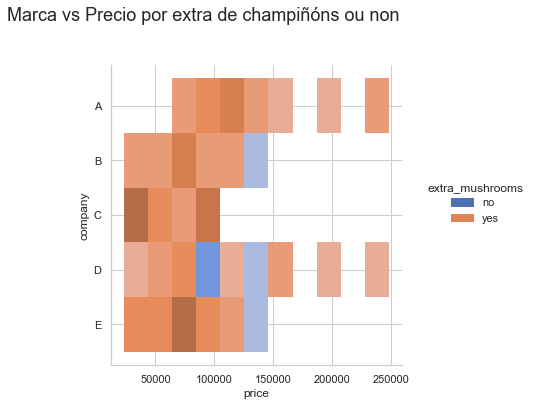

In [53]:
box = sns.displot(data=df,x='price',y='company',hue='extra_sauce')
box.fig.text(0.3,1.1,'Marca vs Precio por extra de prebe ou non ',ha='center',va='center',fontsize=18)
box = sns.displot(data=df,x='price',y='company',hue='extra_cheese')
box.fig.text(0.3,1.1,'Marca vs Precio por extra de queixo ou non ',ha='center',va='center',fontsize=18)
box =sns.displot(data=df,x='price',y='company',hue='extra_mushrooms')
box.fig.text(0.3,1.1,'Marca vs Precio por extra de champiñóns ou non ',ha='center',va='center',fontsize=18)

Podese apreciar que a compañia C cobra menos que as outras en relación a coberturas adicionais. E que A e D son as que mais cobran polas coberturas adicionais

##### Diametro- tamaño

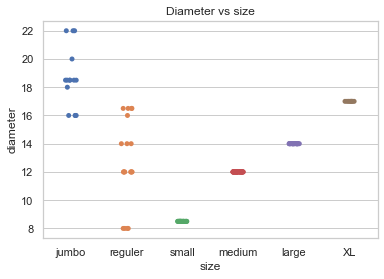

In [54]:


sns.stripplot(x='size', y='diameter', data=df)
plt.title('Diameter vs size')
plt.show()



* Pizza pequeña ten un diámetro de 8 polgadas
* A pizza mediana ten un diámetro de 12 polgadas.
* A pizza grande ten un diámetro de 14 polgadas.
* A pizza XL teñen un diámetro de 17 polgadas.
* Curiosamente, para pizzas 'regular' e 'jumbo', o diámetro no es fixo.

Pizzas jumbo e regular imos facer unha analise mais detallada.


Pizzas jumbo

In [55]:
#pizzas jumbo
#creamos un dataset
df_jumbo = df[df['size'] == 'jumbo']
df_jumbo.head()



,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000.0,20.0,papperoni,double_signature,jumbo,yes,yes,no
4,A,248000.0,18.0,mozzarella,double_signature,jumbo,yes,no,yes
5,A,140000.0,18.5,black_papper,american_favorite,jumbo,no,no,yes
6,A,110000.0,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes


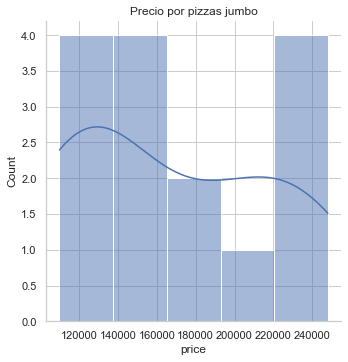

In [56]:
sns.displot(data=df_jumbo, x="price", kde=True)
plt.title('Precio por pizzas jumbo')
plt.show()




O precio mínimo e dunhas 125000 rupias, que es máis alto que o precio promedio de todas as pizzas (alrededor de 87000 rupias)

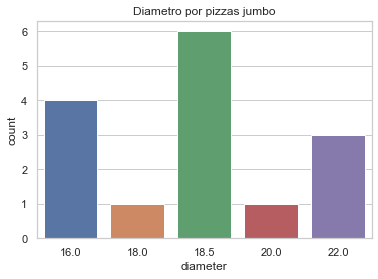

In [57]:
sns.countplot(x='diameter', data=df_jumbo)
plt.title('Diametro por pizzas jumbo')
plt.show()


Entre as  pizzas jumbo, o diametro parece maior a 17 polgadas (diámetro das pizzas tamaño XL).
Que facemos logo cas pizzas de 16 polgadas.

In [58]:


df_jumbo[df_jumbo['diameter']==16]



,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
6,A,110000.0,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes
11,A,110000.0,16.0,black_papper,super_supreme,jumbo,yes,yes,no
16,A,110000.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,yes
80,D,110000.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,no


Unha solución para este problema seria borrar as pizzas de 16 de diametro, nos non o imos facer pero se foramos a usar o modelo para predecir seria unha boa tactica.
o borrarlas xa se veria mais claramente que o diametro superior de  18 seria pas pizzas jumbo. 

In [59]:
#a forrar de borrar os outliners de diametro seria esta:
# df = df.loc[~((df['size'] == 'jumbo') & (df['diameter'] == 16)),:]



Pizzas regular

In [60]:
df_regular = df[df['size'] == 'reguler']
df_regular.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
2,A,120000.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
7,A,70000.0,8.0,papperoni,american_favorite,reguler,no,no,yes
8,A,90000.0,12.0,mushrooms,american_favorite,reguler,yes,no,yes
9,A,90000.0,12.0,smoked_beef,american_favorite,reguler,no,no,no


In [61]:
df_regular.company.value_counts()
#Observamos que a pizza jumbo no tamaño regular solo as venden a compañia A e D

A    14
D     6
Name: company, dtype: int64

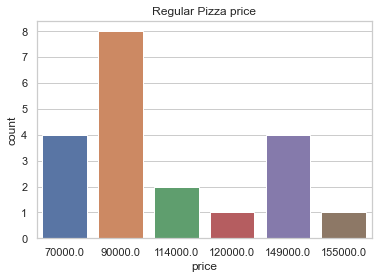

In [62]:
sns.countplot(x='price', data=df_regular)
plt.title('Regular Pizza price')
plt.show()




A maioria das pizzas regular parecen ter un precio arredor de 90000 rupias, que atopase cerca do promedio xeral(8700)

In [63]:
df_regular.variant.value_counts()

#As mais populares son a meat_lovers e double_mix

meat_lovers          6
double_mix           6
american_favorite    3
super_supreme        3
double_signature     2
Name: variant, dtype: int64

A conclusión que sacamos non e clara  non sabemos que fai que unha pizza regular sexa unha pizza regular. O tamaño deberia estar so relacionado co diametro. Por ese motivo se este dataset fora para predecir deberiamos de borralo. Nos non o imos facer por que significaria borrar 20 filas e xa temos un dataset pequeno.



In [64]:
#no caso de decidir borralo fariase asi 
#df = df.loc[~(df['size'] == 'regular'),:]



##### Diametro-ingrediente- marca

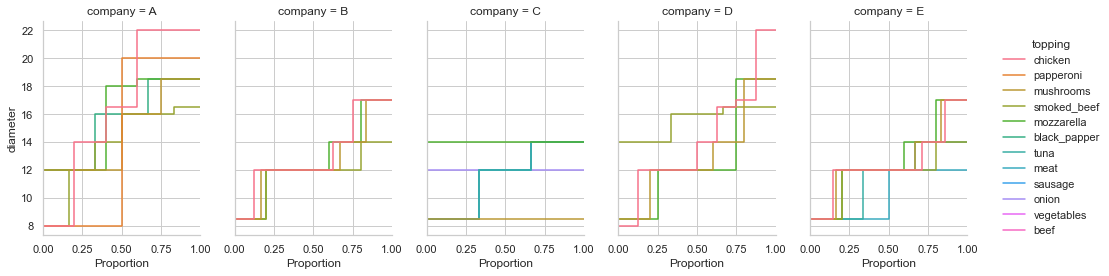

In [65]:
sns.displot(
    data=df, y="diameter", hue="topping", col="company",
    kind="ecdf", height=4, aspect=.7,
)

Aqui vemos como a Marca B e que menos ingredientes principais ten(3) e que solo ten catro tipos de diametros pero  a C un ingrediente mais pero ten menos diametro.
A que mais variedade da en canto a diametro e a A.

### 5. Conclusión:
En xeral podemos sacar as seguintes conclusións: 

A relación mais directa que existe e o precio respecto o diametro, canto mais diametro a pizza e mais cara.

A marca mais cara e a A, e tamen e a que ten as pizzas con mais diametro.

O ingrediente mais caro e o peperoni.

O ingrediente que esta mais presente e o polo.

A variante mais cara e a double singnature.

As coberturas en xeral non encarecen demasiado o  precio das pizzas, a cobertura mais usada e a de extra de queixo.

